script for the H3 lin reference calculation

In [1]:
from pyscf import gto, scf, mcscf
import numpy as np
import matplotlib.pyplot as plt
from pyblock2._pyscf.ao2mo import integrals as itg
from pyblock2.driver.core import DMRGDriver, SymmetryTypes
import os 
from pyscf.tools import molden

Use this to delete the temp files BEFORE a dmrg calculation

In [8]:
folder_path = "./tmp2"  #change here the directory where the tmp files are located

for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        
        # Check if it's a file (not a directory) and delete it
        if os.path.isfile(file_path):
            os.remove(file_path)
            print(f"Deleted: {file_path}")

Deleted: ./tmp2/F.MPS.GS.0
Deleted: ./tmp2/F.MPS.GS.1
Deleted: ./tmp2/F.MPS.GS.2
Deleted: ./tmp2/F.MPS.GS.3
Deleted: ./tmp2/F.MPS.GS.4
Deleted: ./tmp2/F.MPS.GS.5
Deleted: ./tmp2/F.MPS.INFO.GS.LEFT.0
Deleted: ./tmp2/F.MPS.INFO.GS.RIGHT.0
Deleted: ./tmp2/F.MPS.INFO.GS.LEFT.1
Deleted: ./tmp2/F.MPS.INFO.GS.RIGHT.1
Deleted: ./tmp2/F.MPS.INFO.GS.LEFT.2
Deleted: ./tmp2/F.MPS.INFO.GS.RIGHT.2
Deleted: ./tmp2/F.MPS.INFO.GS.LEFT.3
Deleted: ./tmp2/F.MPS.INFO.GS.RIGHT.3
Deleted: ./tmp2/F.MPS.INFO.GS.LEFT.4
Deleted: ./tmp2/F.MPS.INFO.GS.RIGHT.4
Deleted: ./tmp2/F.MPS.INFO.GS.LEFT.5
Deleted: ./tmp2/F.MPS.INFO.GS.RIGHT.5
Deleted: ./tmp2/F.MPS.INFO.GS.LEFT.6
Deleted: ./tmp2/F.MPS.INFO.GS.RIGHT.6
Deleted: ./tmp2/F.MPS.GS.-1
Deleted: ./tmp2/GS-mps_info.bin
Deleted: ./tmp2/F.MPS.INFO.PDM-KET@TMP.LEFT.0
Deleted: ./tmp2/F.MPS.INFO.PDM-KET@TMP.RIGHT.0
Deleted: ./tmp2/F.MPS.INFO.PDM-KET@TMP.LEFT.1
Deleted: ./tmp2/F.MPS.INFO.PDM-KET@TMP.RIGHT.1
Deleted: ./tmp2/F.MPS.INFO.PDM-KET@TMP.LEFT.2
Deleted: ./tmp2/F.MPS

UHF of H3 linear with sto-3g basis set

In [3]:
H3_lin = gto.M(atom=[["H", 0, 0, 0],
                     ["H", 0.93, 0, 0], 
                     ["H", -0.93, 0, 0]], basis = 'sto-3g', charge = 0, spin = 1)
uhf3=scf.UHF(H3_lin)
uhf3.kernel()

H3lin_alpha_coeff=uhf3.mo_coeff[0]
H3lin_beta_coeff=uhf3.mo_coeff[1]
H3lin_alpha_en=uhf3.mo_energy[0]
H3lin_beta_en=uhf3.mo_energy[1]
H3lin_alpha_occ=uhf3.mo_occ[0]
H3lin_beta_occ=uhf3.mo_occ[1]
print('Number of alpha coefficients:', len(H3lin_alpha_coeff))
print('Alpha orbital energies: ', H3lin_alpha_en)
print('Number of beta coefficients:', len(H3lin_beta_coeff))
print('Beta orbital energies: ', H3lin_beta_en)

mo = (uhf3.mo_coeff[0][:,uhf3.mo_occ[0]>0], uhf3.mo_coeff[1][:,uhf3.mo_occ[1]>0])
overlap = H3_lin.intor('int1e_ovlp')

print(mo)
print('S^2 = %.7f, 2S+1 = %.7f' % scf.uhf.spin_square(mo, H3_lin.intor('int1e_ovlp_sph')))
print(overlap)
print(overlap.shape)

converged SCF energy = -1.54687750275231  <S^2> = 0.79069825  2S+1 = 2.0402924
Number of alpha coefficients: 3
Alpha orbital energies:  [-0.66689593 -0.36190614  0.75033036]
Number of beta coefficients: 3
Beta orbital energies:  [-0.54854865  0.24051493  0.8617014 ]
(array([[ 4.03795675e-01, -6.92814283e-16],
       [ 4.43146882e-01,  7.66678643e-01],
       [ 4.43146882e-01, -7.66678643e-01]]), array([[0.67036411],
       [0.26741582],
       [0.26741582]]))
S^2 = 0.7906982, 2S+1 = 2.0402924
[[1.         0.53862286 0.53862286]
 [0.53862286 1.         0.14936495]
 [0.53862286 0.14936495 1.        ]]
(3, 3)


create molden files to visualise the orbitals

In [4]:
with open('H3lin_sto3g_alpha.molden', 'w') as file_alpha3:
    molden.header(H3_lin, file_alpha3)
    molden.orbital_coeff(H3_lin, file_alpha3, H3lin_alpha_coeff, ene=H3lin_alpha_en, occ=H3lin_alpha_occ)

with open('H3lin_sto3g_beta.molden', 'w') as file_beta3:
    molden.header(H3_lin, file_beta3)
    molden.orbital_coeff(H3_lin, file_beta3, H3lin_beta_coeff, ene=H3lin_beta_en, occ=H3lin_beta_occ)

Plot the energies of each iteration

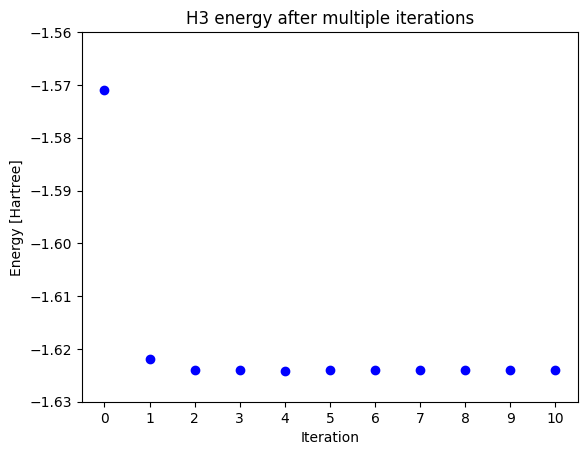

In [3]:
#plot energies of H3 spin optimizer

x1 = np.arange(0, 7, 1)
x2 = np.arange(0,11,1)
FCI_H3 = np.full(11, -1.656308543121)
H3_energies = [-1.571043, -1.575703, -1.583686, -1.620579, -1.620745, -1.588478, -1.485866]
H3_energies_project2 = [-1.571043, -1.575703, -1.583685, -1.511214, -1.563584, -1.516852, -1.526479]
H3_energies_sep_project = [-1.571043, -1.575685, -1.583550, -1.620243, -1.620413, -1.621782, -1.621845]
H3_en_2iter = [-1.621845, -1.621983, -1.621988, -1.624185, -1.624199, -1.624056, -1.623964]
#H3_energies_project4 = [-1.571043, -1.575703, -1.583686, -1.620579, -1.620745, -1.588479, -1.489348]
H3_energies_6_iter = [-1.571043, -1.621845, -1.623964, -1.624079, -1.624091, -1.624039, -1.623925]
H3_energies_10iter = [-1.571043, -1.621845, -1.623964, -1.624079, -1.624091, -1.624039, -1.623925, 
                      -1.623987, -1.623977, -1.623899, -1.623959]
Delta_E = [-0.050802000000000014, -0.002118999999999982, -0.00011500000000008725, -1.1999999999900979e-05, 
           5.199999999994098e-05, 0.00011399999999994748]

fig, ax = plt.subplots()
#ax.scatter(x1, H3_energies, color='blue', label='no projection')
#ax.scatter(x1, H3_energies_sep_project, color='green', label='orbs projected out')
#ax.scatter(x1, H3_en_2iter, color='blue', label='2nd iteration')
ax.scatter(x2, H3_energies_10iter, color='blue')
#ax.plot(x2, FCI_H3, color='black')
#ax.legend(loc='upper right', fontsize='small')

ax.set_xlabel('Iteration')
ax.set_ylabel('Energy [Hartree]')
ax.set_title('H3 energy after multiple iterations')
#ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.4f}'))
#ax.set_xticks(np.arange(0.0, 4.5, 0.5))
ax.set_xticks(np.arange(0, 11, 1))
#ax.set_xticklabels(['init', 'a_1', 'b_1', 'a_2', 'b_2', 'a_3', 'b_3'])

ax.set_yticks(np.arange(-1.56, -1.64, -0.01))

plt.show()

In [ ]:
num = 1.75 - 9.798772e-01 - 2.221467e-29 #S^2 of initial orbs of spin orb opt code
print(num)

0.7701228


UHF calculation of the same geometry with 6-31g basis set

In [12]:
H3_lin = gto.M(atom=[["H", 0, 0, 0],
                     ["H", 0.93, 0, 0], 
                     ["H", -0.93, 0, 0]], basis = '6-31g', charge = 0, spin = 1)
uhf_631g=scf.UHF(H3_lin)
uhf_631g.kernel()

H3lin_631g_alpha_coeff=uhf_631g.mo_coeff[0]
H3lin_631g_beta_coeff=uhf_631g.mo_coeff[1]
H3lin_631g_alpha_en=uhf_631g.mo_energy[0]
H3lin_631g_beta_en=uhf_631g.mo_energy[1]
H3lin_631g_alpha_occ=uhf_631g.mo_occ[0]
H3lin_631g_beta_occ=uhf_631g.mo_occ[1]
#print('Number of alpha coefficients:', len(H3lin_631g_alpha_coeff))
print('Alpha orbital energies: ', H3lin_631g_alpha_en)
#print('Number of beta coefficients:', len(H3lin_631g_beta_coeff))
print('Beta orbital energies: ', H3lin_631g_beta_en)
#print('Alpha coeffs: ', H3lin_631g_alpha_coeff)
#print('Beta coeffs: ', H3lin_631g_beta_coeff)

converged SCF energy = -1.59648357874309  <S^2> = 0.78832991  2S+1 = 2.0379695
Alpha orbital energies:  [-0.69785516 -0.40578083  0.28269709  0.87120621  0.94944241  1.30250104]
Beta orbital energies:  [-0.59913752  0.07815749  0.34289086  0.93167385  1.07214258  1.34764606]


In [14]:
alpha_coeffs_npy = np.load('/workspaces/MRA-OrbitalOptimization/coefficients/h3lin_631g_coeffs/h3lin_min/093_alphacoeffs.npy')
beta_coeffs_npy = np.load('/workspaces/MRA-OrbitalOptimization/coefficients/h3lin_631g_coeffs/h3lin_min/093_betacoeffs.npy')

print(H3lin_631g_beta_coeff)
print(beta_coeffs_npy)

[[ 3.65829979e-01  3.90932671e-16  2.31475764e-01 -8.26600313e-01
  -1.28398263e-15 -1.10050627e+00]
 [ 4.90615148e-01 -6.09816941e-15  2.37671253e+00  1.76567860e+00
   2.61453072e-15  2.04845768e+00]
 [ 1.62286355e-01  2.04152169e-01  3.93081232e-03 -6.09096862e-01
  -9.36096437e-01  7.25536102e-01]
 [ 4.44267556e-02  6.98965183e-01 -1.66501591e+00 -2.34789807e-01
   9.73510813e-01 -1.21966635e+00]
 [ 1.62286355e-01 -2.04152169e-01  3.93081232e-03 -6.09096862e-01
   9.36096437e-01  7.25536102e-01]
 [ 4.44267556e-02 -6.98965183e-01 -1.66501591e+00 -2.34789807e-01
  -9.73510813e-01 -1.21966635e+00]]
[[ 3.65829979e-01  2.58282123e-16  2.31475764e-01 -8.26600313e-01
  -3.65634421e-16 -1.10050627e+00]
 [ 4.90615148e-01 -7.93118374e-16  2.37671253e+00  1.76567860e+00
   1.97242488e-15  2.04845768e+00]
 [ 1.62286355e-01  2.04152169e-01  3.93081232e-03 -6.09096862e-01
   9.36096437e-01  7.25536102e-01]
 [ 4.44267556e-02  6.98965183e-01 -1.66501591e+00 -2.34789807e-01
  -9.73510813e-01 -1.219

Export the 6-31g coefficients

In [6]:
np.save('/workspaces/MRA-OrbitalOptimization/coefficients/h3lin_631g_coeffs/h3lin_min/093_alphacoeffs.npy', H3lin_631g_alpha_coeff)
np.save('/workspaces/MRA-OrbitalOptimization/coefficients/h3lin_631g_coeffs/h3lin_min/093_betacoeffs.npy', H3lin_631g_beta_coeff)

DMRG reference calculation with uhf-631-g

In [ ]:
H3_lin = gto.M(atom=[["H", 0, 0, 0],
                     ["H", 0.93, 0, 0], 
                     ["H", -0.93, 0, 0]], basis = '6-31g', charge = 0, spin = 1)
uhf_631g=scf.UHF(H3_lin)
uhf_631g.kernel()

norbs, nelecas = (6, (2, 1))
ref_ucas = mcscf.UCASSCF(uhf_631g, norbs, nelecas).mc1step()[0]

bond_dims = [250] * 30
noises = [1e-4] *  30 + [1e-5] * 30 + [0]
thrds = [1e-8] * 30
ncas, n_elec, spin, ecore, h1e, g2e, orb_sym = itg.get_uhf_integrals(uhf_631g,
    ncore=0, ncas=None, g2e_symm=1)


driver_631g = DMRGDriver(scratch="./tmp2", symm_type=SymmetryTypes.SZ, n_threads=4)
driver_631g.initialize_system(n_sites=ncas, n_elec=n_elec, spin=spin, orb_sym=orb_sym)

mpo_631g = driver_631g.get_qc_mpo(h1e=h1e, g2e=g2e, ecore=ecore, iprint=1)
ket_631g = driver_631g.get_random_mps(tag="GS", bond_dim=250, nroots=1)
energy_631g = driver_631g.dmrg(mpo_631g, ket_631g, n_sweeps=35, bond_dims=bond_dims, noises=noises,
    thrds=thrds, iprint=1)
print('DMRG energy = %20.15f' % energy_631g)
print('difference dmrg UCASSCF', ref_ucas - energy_631g)

converged SCF energy = -1.59648357874309  <S^2> = 0.78832991  2S+1 = 2.0379695


UCASSCF energy = -1.62627880911235
UCASCI E = -1.62627880911235  E(CI) = -3.0487981933059  S^2 = 0.7500000
integral symmetrize error =  0.0
integral cutoff error =  0.0
mpo terms =       2638

Build MPO | Nsites =     6 | Nterms =       2638 | Algorithm = FastBIP | Cutoff = 1.00e-20
 Site =     0 /     6 .. Mmpo =    30 DW = 0.00e+00 NNZ =       30 SPT = 0.0000 Tmvc = 0.001 T = 0.003
 Site =     1 /     6 .. Mmpo =    66 DW = 0.00e+00 NNZ =      277 SPT = 0.8601 Tmvc = 0.001 T = 0.003
 Site =     2 /     6 .. Mmpo =   110 DW = 0.00e+00 NNZ =      483 SPT = 0.9335 Tmvc = 0.001 T = 0.004
 Site =     3 /     6 .. Mmpo =    66 DW = 0.00e+00 NNZ =     1231 SPT = 0.8304 Tmvc = 0.001 T = 0.004
 Site =     4 /     6 .. Mmpo =    30 DW = 0.00e+00 NNZ =      279 SPT = 0.8591 Tmvc = 0.000 T = 0.002
 Site =     5 /     6 .. Mmpo =     1 DW = 0.00e+00 NNZ =       30 SPT = 0.0000 Tmvc = 0.000 T = 0.001
Ttotal =      0.018 Tmvc-total = 0.002 MPO bond dimension =   110 MaxDW = 0.00e+00
NNZ =         2

In [ ]:
#extract the 1- & 2-rdms   -6.734506285965836e-10
onerdm_631g = driver_631g.get_1pdm(ket_631g)
twordm_631g = driver_631g.get_2pdm(ket_631g) 

alpha_1rdm_631g=onerdm_631g[0]
beta_1rdm_631g=onerdm_631g[1]
aa_2rdm_631g = twordm_631g[0]
ab_2rdm_631g = twordm_631g[1]
bb_2rdm_631g = twordm_631g[2]

np.save('/workspaces/MRA-OrbitalOptimization/reduced_density_matrices/h3lin_631g_min/alpha_rdms.npy', alpha_1rdm_631g)
np.save('/workspaces/MRA-OrbitalOptimization/reduced_density_matrices/h3lin_631g_min/beta_rdms.npy', beta_1rdm_631g)
np.save('/workspaces/MRA-OrbitalOptimization/reduced_density_matrices/h3lin_631g_min/alpha_alpha_rdms.npy', aa_2rdm_631g)
np.save('/workspaces/MRA-OrbitalOptimization/reduced_density_matrices/h3lin_631g_min/alpha_beta_rdms.npy', ab_2rdm_631g)
np.save('/workspaces/MRA-OrbitalOptimization/reduced_density_matrices/h3lin_631g_min/beta_beta_rdms.npy', bb_2rdm_631g)

print(beta_1rdm_631g)


#alpha_1rdm_npy = np.load('/workspaces/MRA-OrbitalOptimization/reduced_density_matrices/h3lin_631g_min/alpha_rdms.npy')
#beta_1rdm_npy = np.load('/workspaces/MRA-OrbitalOptimization/reduced_density_matrices/h3lin_631g_min/beta_rdms.npy')

#print(beta_1rdm_npy)

[[ 9.75051667e-01 -1.23572955e-07 -3.05116965e-02 -1.37308417e-02
  -3.35793133e-06  1.39143245e-02]
 [-1.23572955e-07  1.44463595e-02  7.06235096e-08  8.90721176e-07
  -4.84504961e-03 -2.24253624e-07]
 [-3.05116965e-02  7.06235096e-08  4.54766242e-03 -4.11952351e-04
   1.05689300e-07 -3.20298130e-03]
 [-1.37308417e-02  8.90721176e-07 -4.11952351e-04  1.36711124e-03
  -1.92590771e-07  8.93800215e-05]
 [-3.35793133e-06 -4.84504961e-03  1.05689300e-07 -1.92590771e-07
   1.98033690e-03  5.60996475e-08]
 [ 1.39143245e-02 -2.24253624e-07 -3.20298130e-03  8.93800215e-05
   5.60996475e-08  2.60686320e-03]]


In [30]:
alpha_int = h1e[0]
beta_int = h1e[1]
aa_int = g2e[0]
ab_int = g2e[1]
bb_int = g2e[2]

aa_2rdm_631g = twordm_631g[0].transpose(0, 3, 1, 2)
aa_2rdm_631g = np.swapaxes(aa_2rdm_631g, 1, 2)
ab_2rdm_631g = twordm_631g[1].transpose(0, 3, 1, 2)
ab_2rdm_631g = np.swapaxes(ab_2rdm_631g, 1, 2)
bb_2rdm_631g = twordm_631g[2].transpose(0, 3, 1, 2)
bb_2rdm_631g = np.swapaxes(bb_2rdm_631g, 1, 2)

one_body_en = np.einsum('ij,ij->', alpha_1rdm_631g, alpha_int) + np.einsum('ij,ij->', beta_1rdm_631g, beta_int)
one_body_en_spinorbopt = 1.658653 - 5.971821
one_body_en_spinorbopt_k9 = 1.657902 - 5.970898
two_body_en = 0.5 * (np.einsum('ijkl,ikjl->', aa_2rdm_631g, aa_int) + 2 * np.einsum('ijkl,ikjl->', ab_2rdm_631g, ab_int) + 
                     np.einsum('ijkl,ikjl->', bb_2rdm_631g, bb_int))

print(one_body_en)
print(one_body_en_spinorbopt)
print(one_body_en_spinorbopt_k9)

print("Difference 1 electron energy", one_body_en - one_body_en_spinorbopt)
print('difference 1 electron energy k9', one_body_en - one_body_en_spinorbopt_k9)
print(ecore)
#print('difference nuclear repulsion', ecore - 1.422527)
print(two_body_en)
print('difference two electron energy', two_body_en - 1.281763)
print('difference two electron energy k9', two_body_en - 1.324209)
#print('difference total energy', energy_631g + 1.608877)



-4.31858177995752
-4.313168
-4.312996
Difference 1 electron energy -0.005413779957519793
difference 1 electron energy k9 -0.005585779957519854
1.4225193841935486
1.269783586662935
difference two electron energy -0.011979413337064981
difference two electron energy k9 -0.054425413337064965


In [18]:
test = [0, 2]
for i in test:
    for j in test:
        for k in test:
            for l in test:
                print(i, k, j, l)

0 0 0 0
0 0 0 2
0 2 0 0
0 2 0 2
0 0 2 0
0 0 2 2
0 2 2 0
0 2 2 2
2 0 0 0
2 0 0 2
2 2 0 0
2 2 0 2
2 0 2 0
2 0 2 2
2 2 2 0
2 2 2 2
